In [2]:
using Pkg
Pkg.activate(".")
using Plots
using LinearAlgebra
using ForwardDiff

  Activating project at `~/Documents/2025FallExamples/10-17`


In [3]:
# The residual function
f(x) = [x[1]^2/4 + x[2]^2 - 1,
        0.7*x[1]^4 + 0.1*x[1]^3 - 2.5*x[1]^2 + 1 - x[2] ]

f (generic function with 1 method)

In [4]:
# Jacobian
J(x) = [(2*x[1]/4) (2*x[2]);
    (0.7*4*x[1]^3+0.1*3*x[1]^2-2.5*2*x[1]) (-1)]

J (generic function with 1 method)

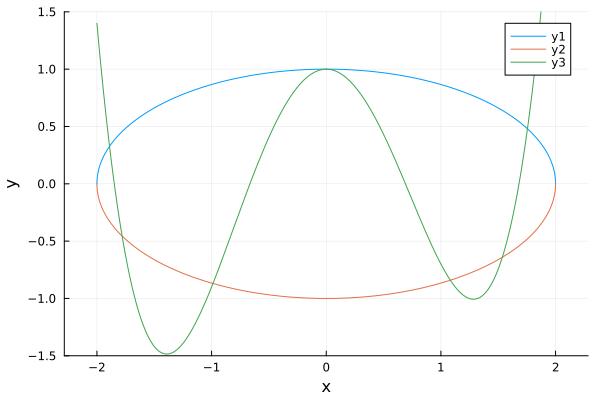

In [5]:
# make a plot (since this is 2D)
plt = plot(x -> +sqrt(1 - x^2 / 4), -2, 2,
    aspect_ratio=:equal, xlabel="x", ylabel="y", ylim=(-1.5, 1.5))
plot!(plt, x -> -sqrt(1 - x^2 / 4), -2, 2)
plot!(plt, x -> 0.7 * x^4 + 0.1 * x^3 - 2.5 * x^2 + 1, -2, 2)

In [13]:
# initial guess
x0 = [1; -2]

# tolerance
AbsTol = 1e-4
RelTol = 1e-4

# maximum iterations
maxIter = 100

# loop using Newton-Raphson
flag = 0
i = 0
xn = copy(x0)
Fn = f(xn)
while flag == 0
    i += 1

    Δx = J(xn)\(-Fn)
    xn += Δx
    Fn = f(xn) # this is both the actual residual and needed for the next step
    err = norm(Fn)

    if err < max(AbsTol, RelTol*norm(xn) )
        flag = 1
    elseif i >= maxIter
        flag = -1
        error("Failed to converge.")
    end

end
xn

2-element Vector{Float64}:
  1.0821431286622851
 -0.8409908414097856

In [14]:
i

4

In [15]:
using ForwardDiff

In [16]:
Jn(x) = ForwardDiff.jacobian(f,x)

Jn (generic function with 1 method)

In [17]:
Jn(xn) - J(xn) |> norm

0.0

demo junk

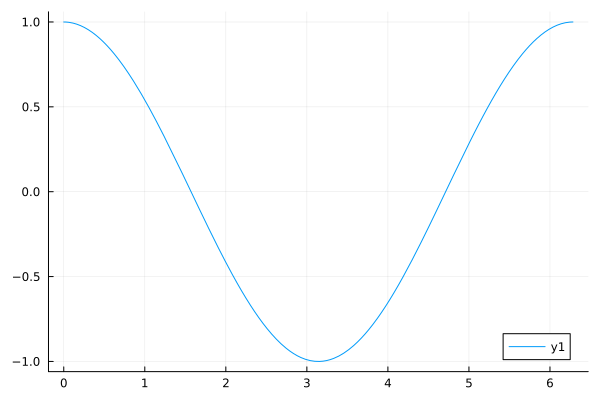

In [24]:
plot(x->ForwardDiff.derivative(x->sin(x),x), 0, 2π)

In [25]:
h(x0) = ForwardDiff.derivative(x->sin(x),x0)

h (generic function with 1 method)

0.0